In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
e_hf = -1.06610864
e_fci = -1.101150330232
hf_err = abs(e_hf - e_fci)

In [17]:
data_dir = "h2_scratch"
df = pd.read_hdf(f"{data_dir}/eigvals.hdf5", "eigenvalues")
print(df.head())

   d           eps    energy  num_pos
i                                    
0  1  1.000000e-08 -1.066109        1
1  2  1.000000e-08 -1.101150        2
2  3  1.000000e-08 -1.101150        2
3  4  1.000000e-08 -1.101150        2
4  5  1.000000e-08 -1.101150        2


In [18]:
df["err"] = np.abs(df["energy"] - e_fci)

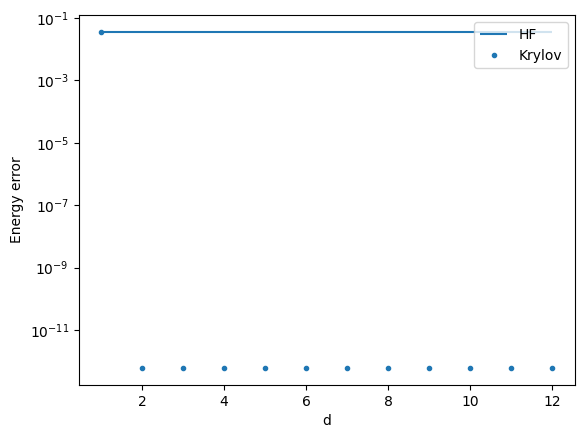

In [19]:
fig, ax = plt.subplots()

x_max = np.max(df["d"])
x_min = np.min(df["d"])

ax.set_yscale('log')
ax.hlines(hf_err, x_min, x_max, label="HF")
# ax.hlines(e_fci, x_min, x_max, label="FCI")
ax.plot(df["d"], df["err"], '.', label="Krylov")
ax.set_xlabel("d")
ax.set_ylabel("Energy error")
plt.legend()